In [1]:
%pip install -q pandas
import pandas as pd


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
URL1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv'
df1 = pd.read_csv(URL1)
print(df1)
URL2 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv'
df2 = pd.read_csv(URL2)
print(df2)

      year  month  date_of_month  day_of_week  births
0     1994      1              1            6    8096
1     1994      1              2            7    7772
2     1994      1              3            1   10142
3     1994      1              4            2   11248
4     1994      1              5            3   11053
...    ...    ...            ...          ...     ...
3647  2003     12             27            6    8646
3648  2003     12             28            7    7645
3649  2003     12             29            1   12823
3650  2003     12             30            2   14438
3651  2003     12             31            3   12374

[3652 rows x 5 columns]
      year  month  date_of_month  day_of_week  births
0     2000      1              1            6    9083
1     2000      1              2            7    8006
2     2000      1              3            1   11363
3     2000      1              4            2   13032
4     2000      1              5            3   12558
...

In [3]:
df1['year'] = pd.to_numeric(df1['year'])
df1 = df1.loc[df1['year'] < 2002]
print(df1)
df2['year'] = pd.to_numeric(df2['year'])
df2 = df2.loc[df2['year'] > 2001]
print(df2)

      year  month  date_of_month  day_of_week  births
0     1994      1              1            6    8096
1     1994      1              2            7    7772
2     1994      1              3            1   10142
3     1994      1              4            2   11248
4     1994      1              5            3   11053
...    ...    ...            ...          ...     ...
2917  2001     12             27            4   13762
2918  2001     12             28            5   13918
2919  2001     12             29            6    9365
2920  2001     12             30            7    7679
2921  2001     12             31            1   10018

[2922 rows x 5 columns]
      year  month  date_of_month  day_of_week  births
731   2002      1              1            2    7927
732   2002      1              2            3   10723
733   2002      1              3            4   12465
734   2002      1              4            5   12671
735   2002      1              5            6    8902
...

In [4]:
DF = pd.concat([df1, df2], axis=0)
DF

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


In [5]:
DF['day_month_year'] = DF['date_of_month'].astype(str) + '-' + DF['month'].astype(str)
DF['day_month_year'] = DF['day_month_year'].astype(str) + '-' + DF['year'].astype(str)
DF

,year,month,date_of_month,day_of_week,births,day_month_year
0,1994,1,1,6,8096,1-1-1994
1,1994,1,2,7,7772,2-1-1994
2,1994,1,3,1,10142,3-1-1994
3,1994,1,4,2,11248,4-1-1994
4,1994,1,5,3,11053,5-1-1994
...,...,...,...,...,...,...
5474,2014,12,27,6,8656,27-12-2014
5475,2014,12,28,7,7724,28-12-2014
5476,2014,12,29,1,12811,29-12-2014
5477,2014,12,30,2,13634,30-12-2014


In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


       births  month
month               
1      335198      1
2      303534      2
3      338684      3
4      323613      4
5      344017      5
6      331085      6
7      351047      7
8      361802      8
9      342564      9
10     344074     10
11     323746     11
12     326569     12


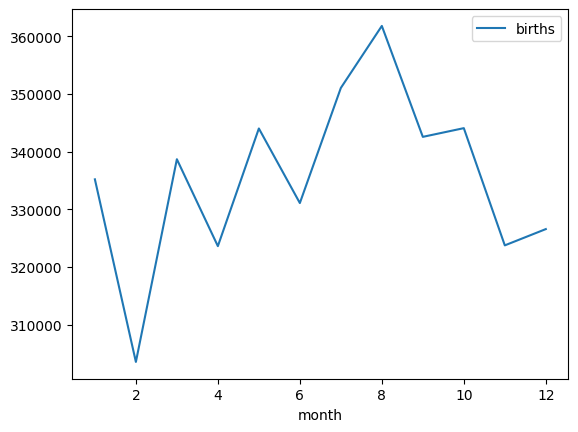

In [7]:
DF['year'] = pd.to_numeric(DF['year'])
month = DF.loc[DF['year'] == 2001]
month = month.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
print(month)
Month = month.plot(x='month', y='births', kind='line')

             births  day_of_week
day_of_week                     
1            593186            1
2            649813            2
3            643274            3
4            648233            4
5            640380            5
6            453928            6
7            397119            7


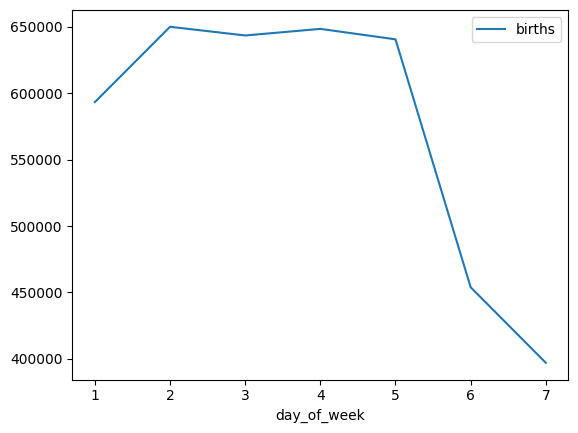

In [8]:
DF['year'] = pd.to_numeric(DF['year'])
week = DF.loc[DF['year'] == 2001]
week = week.groupby(['day_of_week']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    day_of_week = pd.NamedAgg (column = 'day_of_week', aggfunc= 'min'))
print(week)
Day_of_week = week.plot(x='day_of_week', y='births', kind='line')

       births  month
month               
1      335198      1
12     326569     12


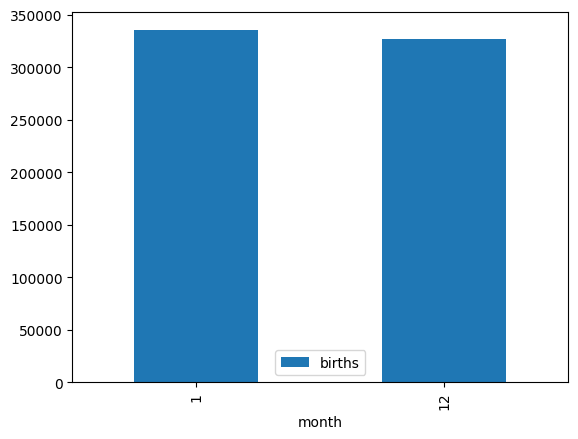

In [9]:
DF['year'] = pd.to_numeric(DF['year'])
firstandlast = DF.loc[DF['year'] == 2001]
firstandlast = firstandlast.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
firstandlast = firstandlast[firstandlast["month"].isin([1, 12])]
print(firstandlast)
FandL =firstandlast.plot.bar(x='month', y='births')

<AxesSubplot: xlabel='date_of_month'>

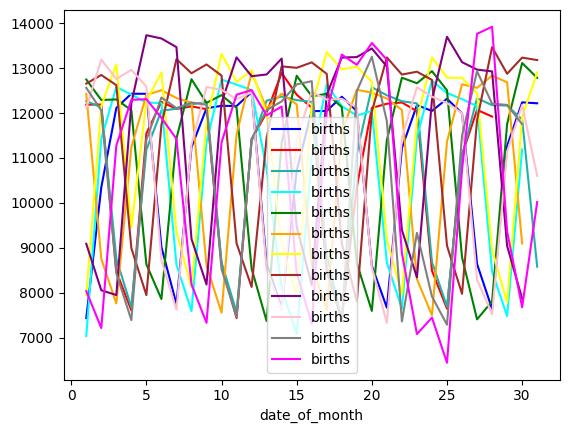

In [10]:
DF['year'] = pd.to_numeric(DF['year'])
days_of_month = DF.loc[DF['year'] == 2001]
days_of_month = days_of_month.drop(['year', 'day_of_week', 'day_month_year'], axis = 1)
first_month = days_of_month.loc[days_of_month['month'] == 1]
second_month = days_of_month.loc[days_of_month['month'] == 2]
third_month = days_of_month.loc[days_of_month['month'] == 3]
fourth_month = days_of_month.loc[days_of_month['month'] == 4]
fifth_month = days_of_month.loc[days_of_month['month'] == 5]
sixth_month = days_of_month.loc[days_of_month['month'] == 6]
seventh_month = days_of_month.loc[days_of_month['month'] == 7]
eighth_month = days_of_month.loc[days_of_month['month'] == 8]
ninth_month = days_of_month.loc[days_of_month['month'] == 9]
tenth_month = days_of_month.loc[days_of_month['month'] == 10]
eleventh_month = days_of_month.loc[days_of_month['month'] == 11]
twelfth_month = days_of_month.loc[days_of_month['month'] == 12]
ax = first_month.plot(x='date_of_month', y='births', kind='line', c='blue')
second_month.plot(x='date_of_month', y='births', kind='line', c='red', ax=ax)
third_month.plot(x='date_of_month', y='births', kind='line', c='lightseagreen', ax=ax)
fourth_month.plot(x='date_of_month', y='births', kind='line', c='aqua', ax=ax)
fifth_month.plot(x='date_of_month', y='births', kind='line', c='green', ax=ax)
sixth_month.plot(x='date_of_month', y='births', kind='line', c='orange', ax=ax)
seventh_month.plot(x ='date_of_month', y ='births', kind='line', c='yellow', ax=ax)
eighth_month.plot(x ='date_of_month', y ='births', kind='line', c='brown', ax=ax)
ninth_month.plot(x ='date_of_month', y ='births', kind='line', c='purple', ax=ax)
tenth_month.plot(x='date_of_month', y='births', kind='line', c='pink', ax=ax)
eleventh_month.plot(x='date_of_month', y='births', kind='line', c='gray', ax=ax)
twelfth_month.plot(x='date_of_month', y='births', kind='line', c='fuchsia', ax=ax)

<AxesSubplot: xlabel='month'>

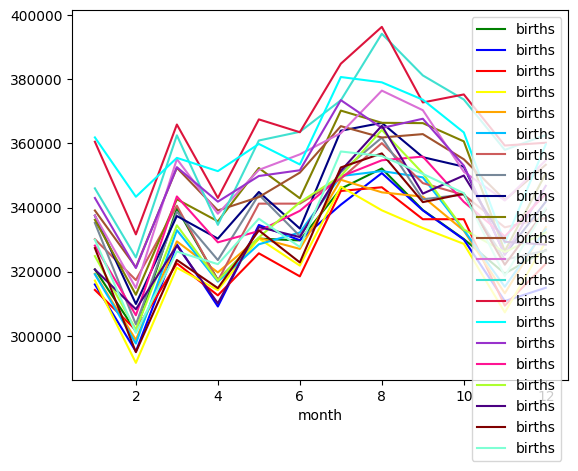

In [15]:
everyyear = DF.drop(['date_of_month', 'day_of_week', 'day_month_year'], axis = 1)
year1994 = everyyear.loc[everyyear['year'] == 1994]
months1994 = year1994.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year1995 = everyyear.loc[everyyear['year'] == 1995]
months1995 = year1995.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year1996 = everyyear.loc[everyyear['year'] == 1996]
months1996 = year1996.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year1997 = everyyear.loc[everyyear['year'] == 1997]
months1997 = year1997.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year1998 = everyyear.loc[everyyear['year'] == 1998]
months1998 = year1998.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year1999 = everyyear.loc[everyyear['year'] == 1999]
months1999 = year1999.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2000 = everyyear.loc[everyyear['year'] == 2000]
months2000 = year2000.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2001 = everyyear.loc[everyyear['year'] == 2001]
months2001 = year2001.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2002 = everyyear.loc[everyyear['year'] == 2002]
months2002 = year2002.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2003 = everyyear.loc[everyyear['year'] == 2003]
months2003 = year2003.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2004 = everyyear.loc[everyyear['year'] == 2004]
months2004 = year2004.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2005 = everyyear.loc[everyyear['year'] == 2005]
months2005 = year2005.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2006 = everyyear.loc[everyyear['year'] == 2006]
months2006 = year2006.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2007 = everyyear.loc[everyyear['year'] == 2007]
months2007 = year2007.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2008 = everyyear.loc[everyyear['year'] == 2008]
months2008 = year2008.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2009 = everyyear.loc[everyyear['year'] == 2009]
months2009 = year2009.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2010 = everyyear.loc[everyyear['year'] == 2010]
months2010 = year2010.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2011 = everyyear.loc[everyyear['year'] == 2011]
months2011 = year2011.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2012 = everyyear.loc[everyyear['year'] == 2012]
months2012 = year2012.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2013 = everyyear.loc[everyyear['year'] == 2013]
months2013 = year2013.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
year2014 = everyyear.loc[everyyear['year'] == 2014]
months2014 = year2014.groupby(['month']).agg(
    births = pd.NamedAgg (column = 'births', aggfunc = 'sum'),
    month = pd.NamedAgg (column = 'month', aggfunc= 'min'))
ax = months1994.plot(x='month', y='births', kind='line', c='green')
months1995.plot(x='month', y='births', kind='line', c='blue', ax=ax)
months1996.plot(x='month', y='births', kind='line', c='red', ax=ax)
months1997.plot(x='month', y='births', kind='line', c='yellow', ax=ax)
months1998.plot(x='month', y='births', kind='line', c='orange', ax=ax)
months1999.plot(x='month', y='births', kind='line', c='deepskyblue', ax=ax)
months2000.plot(x='month', y='births', kind='line', c='indianred', ax=ax)
months2001.plot(x='month', y='births', kind='line', c='lightslategray', ax=ax)
months2002.plot(x='month', y='births', kind='line', c='navy', ax=ax)
months2003.plot(x='month', y='births', kind='line', c='olive', ax=ax)
months2004.plot(x='month', y='births', kind='line', c='sienna', ax=ax)
months2005.plot(x='month', y='births', kind='line', c='orchid', ax=ax)
months2006.plot(x='month', y='births', kind='line', c='turquoise', ax=ax)
months2007.plot(x='month', y='births', kind='line', c='crimson', ax=ax)
months2008.plot(x='month', y='births', kind='line', c='cyan', ax=ax)
months2009.plot(x='month', y='births', kind='line', c='darkorchid', ax=ax)
months2010.plot(x='month', y='births', kind='line', c='deeppink', ax=ax)
months2011.plot(x='month', y='births', kind='line', c='greenyellow', ax=ax)
months2012.plot(x='month', y='births', kind='line', c='indigo', ax=ax)
months2013.plot(x='month', y='births', kind='line', c='maroon', ax=ax)
months2014.plot(x='month', y='births', kind='line', c='aquamarine', ax=ax)